Predict A Doctor’s Consultation Fee is about predicting the fee a doctor will charge for consultation based on the following features.

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Place: Area and the city where the doctor is located.

Since we are going to predict whole numbers, the problem is a regression problem.

In [234]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [235]:
df=pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [236]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

All the variables apart from the Target variable are string data type.

In [237]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Being in string data type, no other variables could be described. We have here is the target variable, where mean or the average fees doctors in this dataset charge is 307.9, also the minimum fees is 5.0 and Maximum is 950.00

In [238]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

we can observe there are various null values highest in 'Rating' desending to 'Miscellaneous_info' and some in 'Place'. Rest there are no null values in the rest of the columns.

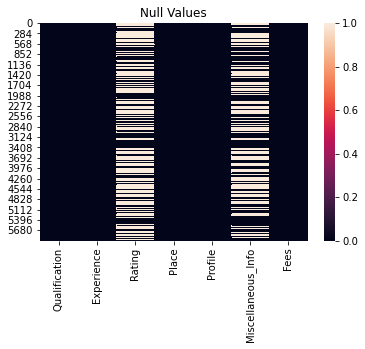

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Findings are very similar but due to very few null values in 'Place' it cannot be spotted on the heatmap. 

In [240]:
df=df.fillna(method='ffill')

In [241]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

no Null values present anymore

# Encoding the data

In [242]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [243]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401.0,16.0,0.0,299.0,5.0,130.0,100
1,73.0,3.0,49.0,866.0,0.0,1422.0,350
2,1135.0,63.0,49.0,457.0,3.0,1422.0,300
3,464.0,3.0,49.0,68.0,0.0,1695.0,250
4,10.0,12.0,0.0,337.0,0.0,253.0,250
...,...,...,...,...,...,...,...
5956,1075.0,10.0,49.0,70.0,3.0,1385.0,300
5957,596.0,26.0,49.0,541.0,4.0,1385.0,100
5958,596.0,35.0,48.0,216.0,4.0,1173.0,600
5959,943.0,6.0,41.0,850.0,4.0,2202.0,100


In [244]:
df.skew()

Qualification         0.239720
Experience            0.823531
Rating               -0.840796
Place                 0.118410
Profile               0.108803
Miscellaneous_Info   -0.101869
Fees                  0.751870
dtype: float64

Keeping +/-(0.5) as the range of skewness.

In [245]:
x=df.drop('Fees', axis =1)
y=df['Fees']

In [246]:
x

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401.0,16.0,0.0,299.0,5.0,130.0
1,73.0,3.0,49.0,866.0,0.0,1422.0
2,1135.0,63.0,49.0,457.0,3.0,1422.0
3,464.0,3.0,49.0,68.0,0.0,1695.0
4,10.0,12.0,0.0,337.0,0.0,253.0
...,...,...,...,...,...,...
5956,1075.0,10.0,49.0,70.0,3.0,1385.0
5957,596.0,26.0,49.0,541.0,4.0,1385.0
5958,596.0,35.0,48.0,216.0,4.0,1173.0
5959,943.0,6.0,41.0,850.0,4.0,2202.0


In [247]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [267]:
df.new.skew()

Qualification        -0.298616
Experience           -0.066770
Rating               -0.896107
Place                -0.266481
Profile              -0.139151
Miscellaneous_Info   -0.314946
dtype: float64

In [268]:
x=df.new

# Checking for outliers

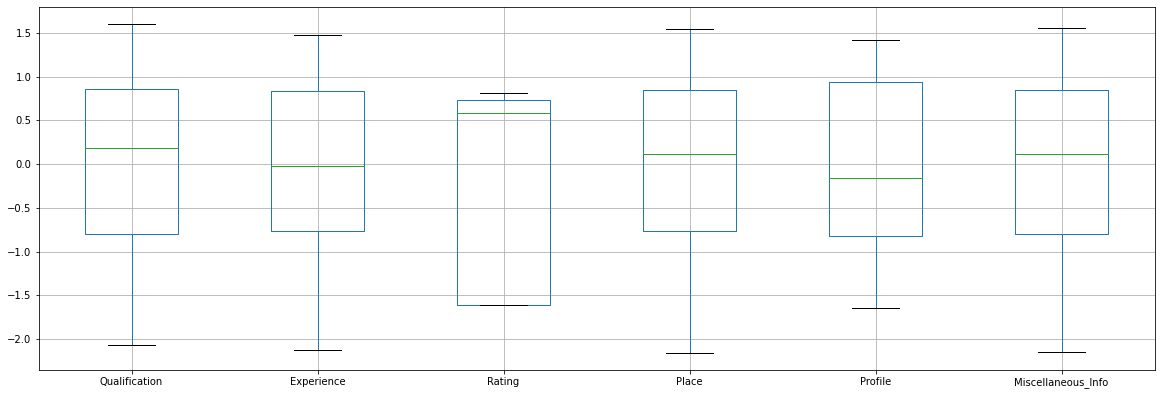

In [297]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

There are no outliers present in the data set.

# Finding best random state

In [270]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression() 
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score

In [272]:
for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train) 
    pred_train=lr.predict(x_train) 
    pred_test=lr.predict(x_test) 
    print (f"At randon state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}") 
    print (f"At random state {i}, the testing accuracy is:{r2_score(y_test,pred_test)}") 
    print("\n")

At randon state 0, the training accuracy is:- 0.07367342782612041
At random state 0, the testing accuracy is:0.10426047569285102


At randon state 1, the training accuracy is:- 0.078790459884294
At random state 1, the testing accuracy is:0.08571690361556294


At randon state 2, the training accuracy is:- 0.08348756917509492
At random state 2, the testing accuracy is:0.06535878034050024


At randon state 3, the training accuracy is:- 0.08592842622546992
At random state 3, the testing accuracy is:0.056017236119602964


At randon state 4, the training accuracy is:- 0.08016248423436434
At random state 4, the testing accuracy is:0.08008121016879821


At randon state 5, the training accuracy is:- 0.07852506087818145
At random state 5, the testing accuracy is:0.08709721612008925


At randon state 6, the training accuracy is:- 0.08067469027865859
At random state 6, the testing accuracy is:0.0736697892355671


At randon state 7, the training accuracy is:- 0.08362032292331012
At random state 7, 

At randon state 66, the training accuracy is:- 0.0854707478926966
At random state 66, the testing accuracy is:0.05922151136961462


At randon state 67, the training accuracy is:- 0.07473661748812366
At random state 67, the testing accuracy is:0.10170350007243512


At randon state 68, the training accuracy is:- 0.07964834253051634
At random state 68, the testing accuracy is:0.08217845751830144


At randon state 69, the training accuracy is:- 0.07973341331769357
At random state 69, the testing accuracy is:0.08116012261815841


At randon state 70, the training accuracy is:- 0.08385240605507804
At random state 70, the testing accuracy is:0.06444863480502716


At randon state 71, the training accuracy is:- 0.08035383127684104
At random state 71, the testing accuracy is:0.07515719683821342


At randon state 72, the training accuracy is:- 0.08082646898573143
At random state 72, the testing accuracy is:0.07725346756236706


At randon state 73, the training accuracy is:- 0.0819368420466351
At r

In [298]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=27)

In [299]:
lr.fit(x_train, y_train)

LinearRegression()

In [300]:
prd_test=dtr.predict(x_test)

In [301]:
print (r2_score(y_test, pred_test))

-0.06635227846180491


# Cross-validation of the model

In [302]:
Train_accuracy=r2_score(y_train,pred_train) 
Test_accuracy= r2_score(y_test,pred_test)

In [303]:
from sklearn.model_selection import cross_val_score 
for j in range (2,10):
    cv_score=cross_val_score (lr , x, y, cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")  
    print("\n")

 At cross fold 2 the cv score is 0.07912192134026863 and accuracy score for training is -0.07091790824132116 and accuracy score for testing is -0.06635227846180491


 At cross fold 3 the cv score is 0.07827728417265319 and accuracy score for training is -0.07091790824132116 and accuracy score for testing is -0.06635227846180491


 At cross fold 4 the cv score is 0.07813206016778412 and accuracy score for training is -0.07091790824132116 and accuracy score for testing is -0.06635227846180491


 At cross fold 5 the cv score is 0.07708062487396908 and accuracy score for training is -0.07091790824132116 and accuracy score for testing is -0.06635227846180491


 At cross fold 6 the cv score is 0.07686089200120803 and accuracy score for training is -0.07091790824132116 and accuracy score for testing is -0.06635227846180491


 At cross fold 7 the cv score is 0.07680519274544097 and accuracy score for training is -0.07091790824132116 and accuracy score for testing is -0.06635227846180491


 At 

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=5 is selected.

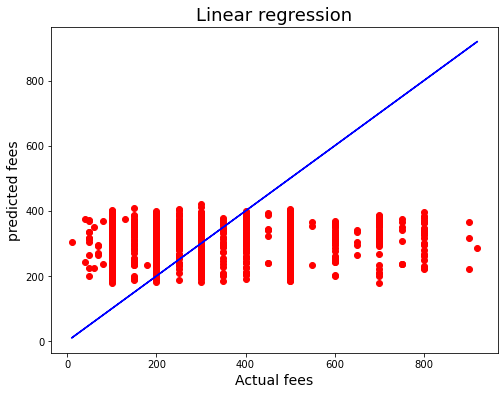

In [304]:
import matplotlib.pyplot as plt 
plt. figure(figsize=(8,6)) 
plt. scatter(x=y_test, y=pred_test, color='r') 
plt.plot(y_test, y_test, color='b') 
plt.xlabel('Actual fees', fontsize=14) 
plt.ylabel('predicted fees', fontsize=14) 
plt.title('Linear regression', fontsize=18) 
plt.show()

# Regularization

In [314]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

In [315]:
from sklearn.linear_model import Lasso 
parameters = {'alpha' : [.0001, .001, .01, .1, 1, 10], 'random_state' :list (range(0,10))} 
ls= Lasso() 
clf= GridSearchCV(ls, parameters) 
clf.fit(x_train, y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [316]:
ls=Lasso(alpha=0.0001, random_state=0) 
ls.fit(x_train, y_train) 
ls.score(x_train, y_train) 
pred_ls=ls.predict(x_test) 
lss = r2_score(y_test ,pred_ls) 
lss

0.10312359174345864

In [317]:
cv_score=cross_val_score (ls , x, y,cv=5) 
cv_mean=cv_score.mean() 
cv_mean

0.07708065789129485

# Ensemble Technique

In [318]:
rf=RandomForestRegressor (criterion="mse", max_features="auto") 
rf.fit(x_train, y_train) 
rf.score(x_train,y_train) 
pred_decision =rf.predict(x_test) 

rfs = r2_score(y_test, pred_decision) 
print('R2 core:' , rfs*100 ) 
     
rfscore = cross_val_score( rf,x,y,cv=5) 
rfc = rfscore.mean() 
print('Cross Val Score:',rfc* 100)

R2 core: 15.494471417883416
Cross Val Score: 12.705540183156325


In [319]:
import pickle 
filename = 'DCF_train_project.pkl'
pickle.dump(rf, open( filename, 'wb' ))

# Conclusion

In [320]:
loaded_model = pickle.load(open('DCF_train_project.pkl', 'rb')) 
result = loaded_model.score(x_test, y_test)

print(result)

0.15494471417883415


In [321]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], pred_decision[:]], index=["Predicted", "orginal"])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192
Predicted,296.5,402.5,370.5,305.0,338.8,264.4,177.15,289.3,389.5,438.5,...,195.5,415.0,378.5,419.5,341.7,349.0,265.5,244.5,407.5,330.5
orginal,296.5,402.5,370.5,305.0,338.8,264.4,177.15,289.3,389.5,438.5,...,195.5,415.0,378.5,419.5,341.7,349.0,265.5,244.5,407.5,330.5


# Working on Test Data

In [348]:
df.test=pd.read_excel('Final_Test.xlsx')
df.test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [349]:
df.test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

All the variables all in string form.

In [350]:
df.test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

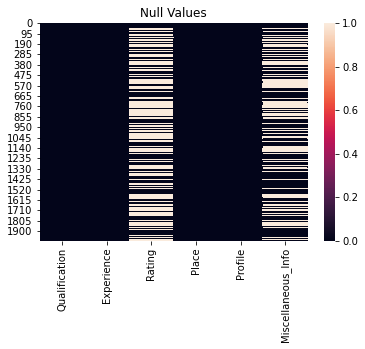

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.test.isnull())
plt.title('Null Values')
plt.show()

As observed there are null valus present in 'Rating' and 'Miscellaneous_Info'.

In [352]:
df.test=df.test.fillna(method='ffill')

In [353]:
df.test.isnull().sum()

Qualification         0
Experience            0
Rating                2
Place                 0
Profile               0
Miscellaneous_Info    2
dtype: int64

There are still few null values left.

In [354]:
df.test=df.test.dropna()

In [355]:
df.test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

# Encoding The Data

In [357]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.test.columns:
    if df.test[i].dtypes=="object":
        df.test[i]=le.fit_transform(df.test[i].values.reshape(-1,1))

# Checking for outliers

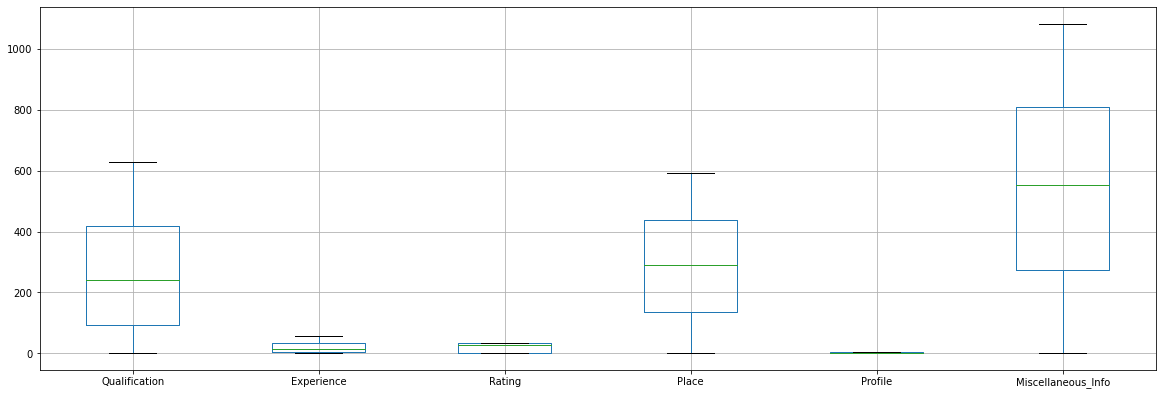

In [358]:
df.test.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

No outliers are present in the data.

# Loading Train Model

In [359]:
fitted_model=pickle.load(open('DCF_train_project.pkl','rb'))

In [360]:
fitted_model

RandomForestRegressor()

In [361]:
predictions=fitted_model.predict(df.test)

In [362]:
predictions

array([480.5, 381.7, 493.5, ..., 480.5, 478. , 480.5])

Predicted Doctor's consultation fess for the test data.